In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import matplotlib.ticker as ticker
%matplotlib notebook

In [2]:
E = np.zeros(200)
I = np.zeros(200)
R = np.zeros(200)
D = np.zeros(200)
S = np.zeros(200)
II = np.zeros(200);              
a_I = 15  
B_I = 0.313 
a_E = 20    
B_E = 0.313  
i_R = 0.9436  
i_D = 0.0579
e_I= 1/7    
e_R = 0.1   
n = 2/3     
n_d = 1   

#td = np.arange(200);
T = np.arange(200)
TimeI = np.zeros(200)
DataI = np.zeros(200)
TimeS = np.zeros(200)
DataS = np.zeros(200)
TimeD = np.zeros(200)
DataD = np.zeros(200)
#DataD1 = np.zeros(200)

for td_indx in range(200):
    max_time_I = 0
    max_number_I = 0
    min_time_S = 0
    min_number_S = 11210000
    equal_number_D = 0
    equal_time_D = 0
    T = np.arange(200)
    E[0] = 650
    I[0] = 433
    R[0] = 123
    D[0] = 17
    S[0] = 11210000
    II[0] = 433
    n_d = 1
    for idx in range(199):
        if idx>=td_indx:
            n_d = 0.3
        S[idx+1] = S[idx] - a_I*B_I*n*n_d*I[idx]*S[idx]/(S[idx] + E[idx] + R[idx] + I[idx] * n) - a_E*B_E*n_d*I[idx]*S[idx]/(S[idx] + E[idx] + R[idx] + I[idx] * n) + i_R*I[idx] + e_R*E[idx]
        E[idx+1] = E[idx] + a_I*B_I*n*n_d*I[idx]*S[idx]/(S[idx] + E[idx] + R[idx] + I[idx] * n) + a_E*B_E*n_d*I[idx]*S[idx]/(S[idx] + E[idx] + R[idx] + I[idx] * n) - e_I*E[idx] - e_R*E[idx]
        I[idx+1] = I[idx] + e_I*E[idx] - i_R*I[idx]- i_D*I[idx]
        R[idx+1] = R[idx] + i_R*I[idx] + e_R*E[idx]
        D[idx+1]= D[idx] + i_D*I[idx]
        II[idx+1] = II[idx]+ I[idx+1]
    for i in range(200):
        if I[i] > max_number_I:
            max_number_I = I[i]
            max_time_I = i 
        if S[i] < min_number_S:
            min_number_S = S[i]
            min_time_S = i 
        if math.floor(D[i])>equal_number_D :
            equal_number_D = math.floor(D[i])
            equal_time_D = i   
      
    TimeI[td_indx] = max_time_I
    DataI[td_indx] = int(max_number_I)
    TimeS[td_indx] = min_time_S
    DataS[td_indx] = int(min_number_S)
 
    TimeD[td_indx] = equal_time_D
    DataD[td_indx] = int(equal_number_D)
   
    #DataD1[td_indx] = int(D[199])

# print(TimeS)
# print(TimeI)
# print(TimeD)


<IPython.core.display.Javascript object>


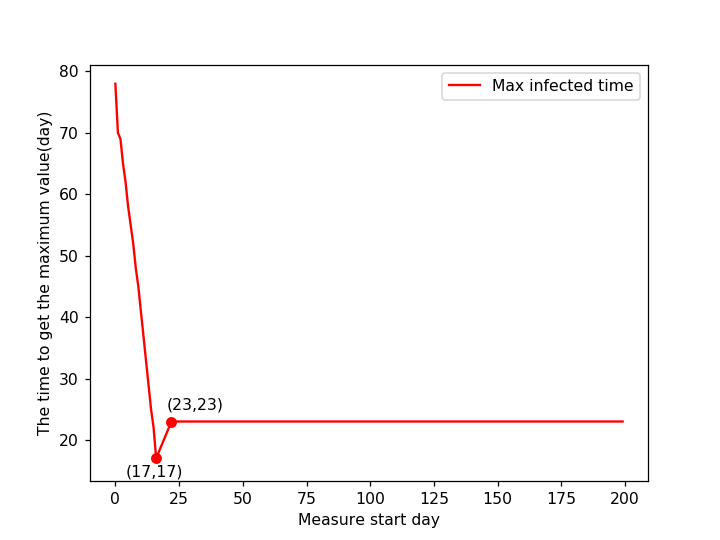

In [3]:
fig1 = plt.figure()
plt.plot(T, TimeI, 'r',label='Max infected time')

plt.scatter(16,17, color='r', marker='o') 
plt.text(4,14,'(17,17)',)
plt.scatter(22,23, color='r', marker='o') 
plt.text(20,25,'(23,23)',)

plt.xlabel("Measure start day")
plt.ylabel('The time to get the maximum value(day)')
plt.legend(['Max infected time'])
fig1.savefig('./Td_I_MaxInfectedTime.svg', dpi = 400, bbox_inches = 'tight')
# print(TimeI)
# print(TimeI[22])

<IPython.core.display.Javascript object>


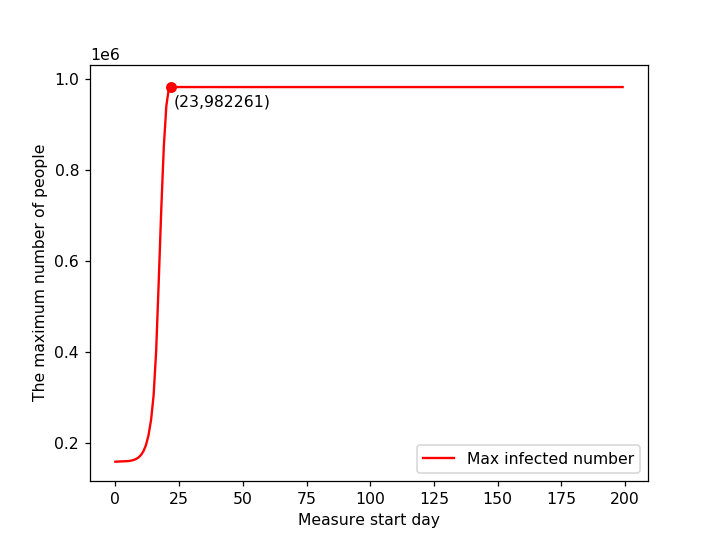

In [4]:
fig2 = plt.figure()
plt.plot(T, DataI, 'r',label='Max infected number')

plt.scatter(22,982261.0, color='r', marker='o') 
plt.text(23,940000,'(23,982261)',)

plt.xlabel("Measure start day")
plt.ylabel('The maximum number of people')
ax = plt.gca()  # 获取当前图像的坐标轴信息
ax.yaxis.get_major_formatter().set_powerlimits((0,1))# 将坐标轴的base number设置为一位。
plt.legend()
fig2.savefig('./Td_I_MaxInfectedNumber.svg', dpi = 400, bbox_inches = 'tight')

<IPython.core.display.Javascript object>


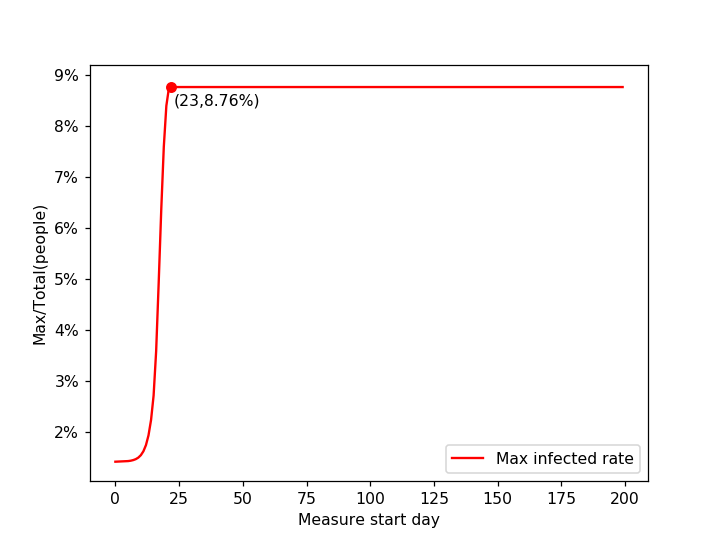

In [5]:
fig3 = plt.figure()
plt.plot(T, DataI/11210000, 'r',label="Max infected rate")

plt.scatter(22,0.08762363960749331, color='r', marker='o') 
plt.text(23,0.084,'(23,8.76%)',)

# 百分数
def to_percent(temp, position):
    return '%1.0f'%(100*temp) + '%'
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(to_percent))

plt.xlabel("Measure start day")
plt.ylabel('Max/Total(people)')
plt.legend()

fig3.savefig('./Td_I_MaxInfectedRate.svg', dpi = 400, bbox_inches = 'tight')
# print(DataI[22]/11210000)

<IPython.core.display.Javascript object>


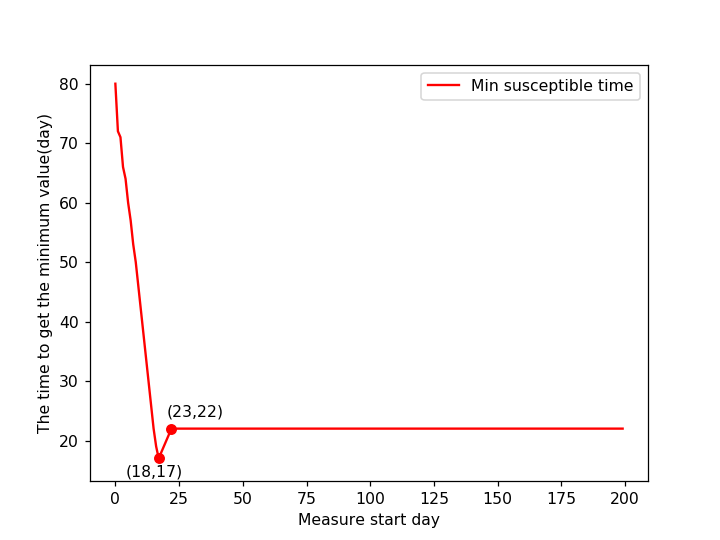

[80. 72. 71. 66. 64. 60. 57. 53. 50. 46. 42. 38. 34. 30. 26. 22. 19. 17.
 18. 19. 20. 21. 22. 22. 22. 22. 22. 22. 22. 22. 22. 22. 22. 22. 22. 22.
 22. 22. 22. 22. 22. 22. 22. 22. 22. 22. 22. 22. 22. 22. 22. 22. 22. 22.
 22. 22. 22. 22. 22. 22. 22. 22. 22. 22. 22. 22. 22. 22. 22. 22. 22. 22.
 22. 22. 22. 22. 22. 22. 22. 22. 22. 22. 22. 22. 22. 22. 22. 22. 22. 22.
 22. 22. 22. 22. 22. 22. 22. 22. 22. 22. 22. 22. 22. 22. 22. 22. 22. 22.
 22. 22. 22. 22. 22. 22. 22. 22. 22. 22. 22. 22. 22. 22. 22. 22. 22. 22.
 22. 22. 22. 22. 22. 22. 22. 22. 22. 22. 22. 22. 22. 22. 22. 22. 22. 22.
 22. 22. 22. 22. 22. 22. 22. 22. 22. 22. 22. 22. 22. 22. 22. 22. 22. 22.
 22. 22. 22. 22. 22. 22. 22. 22. 22. 22. 22. 22. 22. 22. 22. 22. 22. 22.
 22. 22. 22. 22. 22. 22. 22. 22. 22. 22. 22. 22. 22. 22. 22. 22. 22. 22.
 22. 22.]


In [6]:
fig4 = plt.figure()
plt.plot(T, TimeS, 'r',label='Min susceptible time')

plt.scatter(17,17, color='r', marker='o') 
plt.text(4,14,'(18,17)')
plt.scatter(22,22, color='r', marker='o') 
plt.text(20,24,'(23,22)')

plt.xlabel("Measure start day")
plt.ylabel('The time to get the minimum value(day)')
plt.legend()
fig4.savefig('./Td_S_MinSusceptibleTime.svg', dpi = 400, bbox_inches = 'tight')
print(TimeS)

<IPython.core.display.Javascript object>


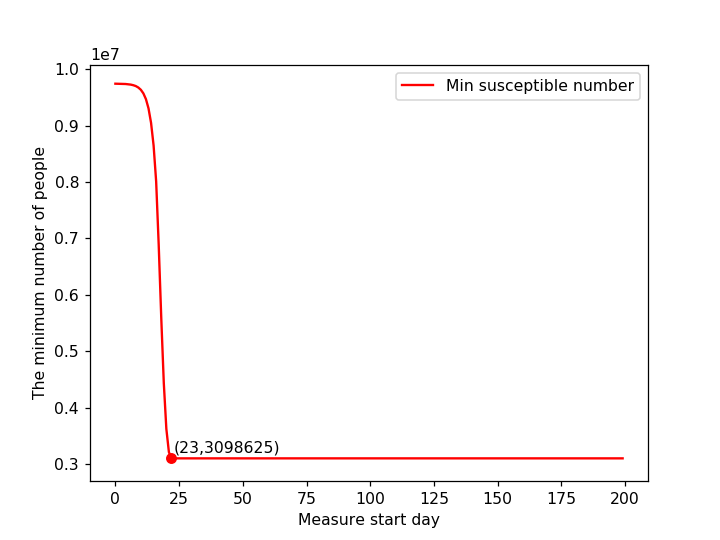

[9741980. 9740689. 9740376. 9738268. 9736543. 9731910. 9726159. 9715704.
 9700278. 9674389. 9634084. 9569536. 9467249. 9304901. 9048634. 8645516.
 8009057. 6886649. 5593817. 4434291. 3621648. 3210066. 3098625. 3098625.
 3098625. 3098625. 3098625. 3098625. 3098625. 3098625. 3098625. 3098625.
 3098625. 3098625. 3098625. 3098625. 3098625. 3098625. 3098625. 3098625.
 3098625. 3098625. 3098625. 3098625. 3098625. 3098625. 3098625. 3098625.
 3098625. 3098625. 3098625. 3098625. 3098625. 3098625. 3098625. 3098625.
 3098625. 3098625. 3098625. 3098625. 3098625. 3098625. 3098625. 3098625.
 3098625. 3098625. 3098625. 3098625. 3098625. 3098625. 3098625. 3098625.
 3098625. 3098625. 3098625. 3098625. 3098625. 3098625. 3098625. 3098625.
 3098625. 3098625. 3098625. 3098625. 3098625. 3098625. 3098625. 3098625.
 3098625. 3098625. 3098625. 3098625. 3098625. 3098625. 3098625. 3098625.
 3098625. 3098625. 3098625. 3098625. 3098625. 3098625. 3098625. 3098625.
 3098625. 3098625. 3098625. 3098625. 3098625. 30986

In [7]:
fig5 = plt.figure()
plt.plot(T, DataS, 'r',label='Min susceptible number')

plt.scatter(22,3098625, color='r', marker='o') 
plt.text(23,3200000,'(23,3098625)')

plt.xlabel("Measure start day")
plt.ylabel('The minimum number of people')
ax = plt.gca()  # 获取当前图像的坐标轴信息
ax.yaxis.get_major_formatter().set_powerlimits((0,1))# 将坐标轴的base number设置为一位。
plt.legend()
fig5.savefig('./Td_S_MinSusceptibleNumber.svg', dpi = 400, bbox_inches = 'tight')
print(DataS)

<IPython.core.display.Javascript object>


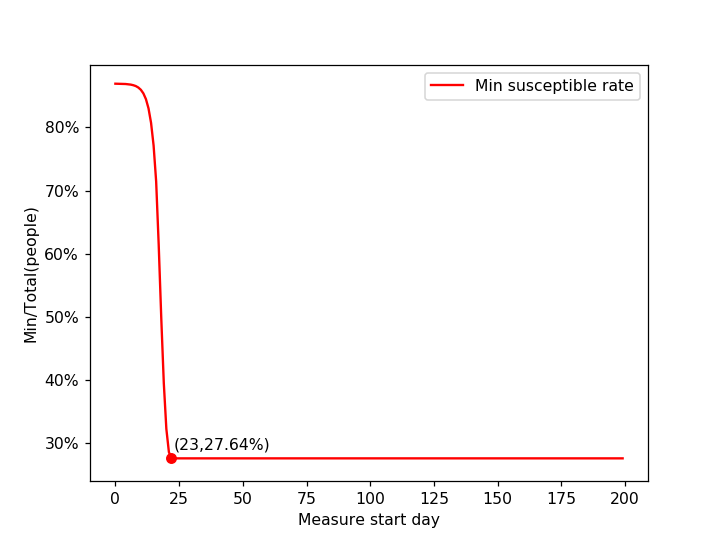

[0.86904371 0.86892855 0.86890062 0.86871258 0.8685587  0.86814541
 0.86763238 0.86669973 0.86532364 0.86301418 0.85941873 0.85366066
 0.84453604 0.83005361 0.80719304 0.77123247 0.71445647 0.61433087
 0.49900241 0.39556566 0.32307297 0.28635736 0.27641615 0.27641615
 0.27641615 0.27641615 0.27641615 0.27641615 0.27641615 0.27641615
 0.27641615 0.27641615 0.27641615 0.27641615 0.27641615 0.27641615
 0.27641615 0.27641615 0.27641615 0.27641615 0.27641615 0.27641615
 0.27641615 0.27641615 0.27641615 0.27641615 0.27641615 0.27641615
 0.27641615 0.27641615 0.27641615 0.27641615 0.27641615 0.27641615
 0.27641615 0.27641615 0.27641615 0.27641615 0.27641615 0.27641615
 0.27641615 0.27641615 0.27641615 0.27641615 0.27641615 0.27641615
 0.27641615 0.27641615 0.27641615 0.27641615 0.27641615 0.27641615
 0.27641615 0.27641615 0.27641615 0.27641615 0.27641615 0.27641615
 0.27641615 0.27641615 0.27641615 0.27641615 0.27641615 0.27641615
 0.27641615 0.27641615 0.27641615 0.27641615 0.27641615 0.2764

In [8]:
fig6 = plt.figure()
plt.plot(T, DataS/11210000, 'r',label="Min susceptible rate")

plt.scatter(22,0.27641615, color='r', marker='o') 
plt.text(23,0.29,'(23,27.64%)')

# 百分数
def to_percent(temp, position):
   return '%1.0f'%(100*temp) + '%'
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(to_percent))

plt.xlabel("Measure start day")
plt.ylabel('Min/Total(people)')
plt.legend()

fig6.savefig('./Td_S_MinSusceptibleRate.svg', dpi = 400, bbox_inches = 'tight')
print(DataS/11210000)

<IPython.core.display.Javascript object>


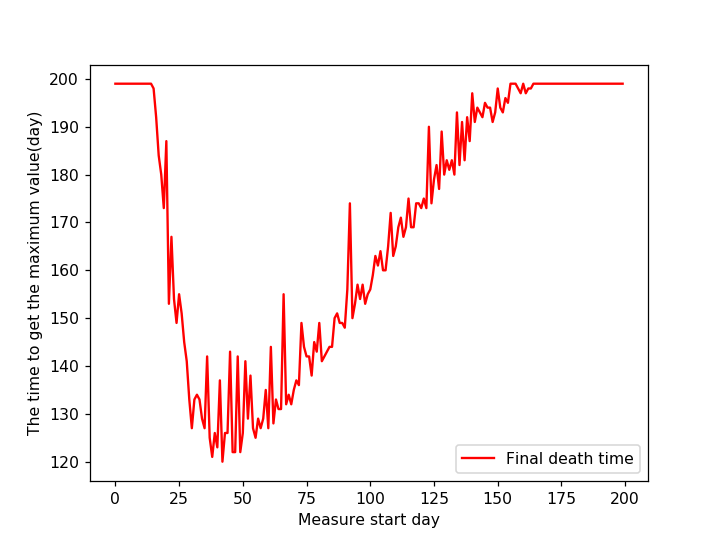

[199. 199. 199. 199. 199. 199. 199. 199. 199. 199. 199. 199. 199. 199.
 199. 198. 192. 184. 180. 173. 187. 153. 167. 154. 149. 155. 151. 145.
 141. 133. 127. 133. 134. 133. 129. 127. 142. 125. 121. 126. 123. 137.
 120. 126. 126. 143. 122. 122. 142. 122. 126. 141. 129. 138. 127. 125.
 129. 127. 129. 135. 127. 144. 128. 133. 131. 131. 155. 132. 134. 132.
 135. 137. 136. 149. 144. 142. 142. 138. 145. 143. 149. 141. 142. 143.
 144. 144. 150. 151. 149. 149. 148. 156. 174. 150. 153. 157. 154. 157.
 153. 155. 156. 159. 163. 161. 164. 160. 160. 165. 172. 163. 165. 169.
 171. 167. 169. 175. 169. 169. 174. 174. 173. 175. 173. 190. 174. 179.
 182. 177. 189. 180. 183. 181. 183. 180. 193. 182. 191. 183. 192. 187.
 197. 191. 194. 193. 192. 195. 194. 194. 191. 193. 198. 194. 193. 196.
 195. 199. 199. 199. 198. 197. 199. 197. 198. 198. 199. 199. 199. 199.
 199. 199. 199. 199. 199. 199. 199. 199. 199. 199. 199. 199. 199. 199.
 199. 199. 199. 199. 199. 199. 199. 199. 199. 199. 199. 199. 199. 199.
 199. 

In [9]:
fig7 = plt.figure()
plt.plot(T, TimeD, 'r',label='Final death time')

# plt.scatter(17,17, color='r', marker='o') 
# plt.text(4,14,'(18,17)')
# plt.scatter(0.16,199, color='r', marker='o') 
# plt.text(0.17,190,'(0.16,199)')

plt.xlabel("Measure start day")
plt.ylabel('The time to get the maximum value(day)')
plt.legend()
fig7.savefig('./Td_D_FinalDeathTime.svg', dpi = 400, bbox_inches = 'tight')
print(TimeD)

<IPython.core.display.Javascript object>


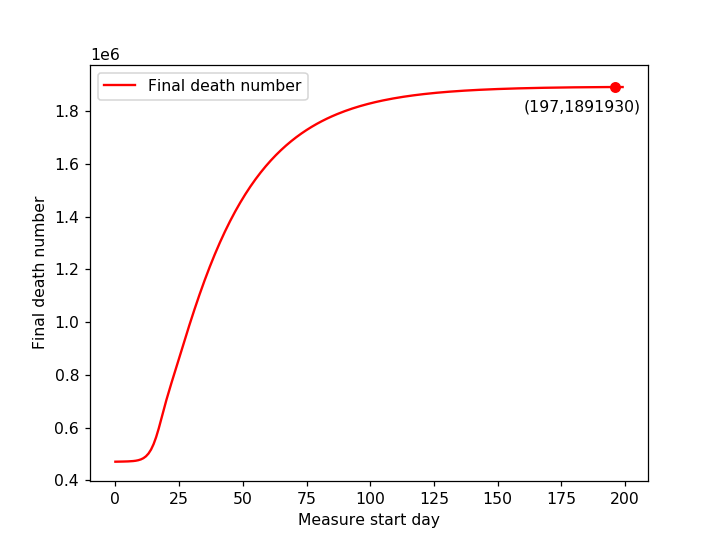

[ 470906.  471212.  471253.  471490.  471679.  472056.  472546.  473367.
  474594.  476554.  479571.  484255.  491344.  501873.  516947.  537597.
  564274.  596427.  632222.  668983.  704378.  737653.  769514.  800883.
  832233.  863659.  895078.  926351.  957336.  987908. 1017965. 1047428.
 1076235. 1104342. 1131718. 1158343. 1184206. 1209301. 1233630. 1257199.
 1280015. 1302091. 1323438. 1344074. 1364013. 1383273. 1401870. 1419824.
 1437153. 1453873. 1470005. 1485566. 1500573. 1515045. 1528998. 1542450.
 1555418. 1567917. 1579964. 1591574. 1602761. 1613542. 1623928. 1633936.
 1643577. 1652865. 1661813. 1670431. 1678733. 1686729. 1694431. 1701849.
 1708993. 1715874. 1722500. 1728881. 1735026. 1740943. 1746642. 1752129.
 1757413. 1762500. 1767399. 1772116. 1776658. 1781031. 1785242. 1789296.
 1793199. 1796957. 1800575. 1804059. 1807413. 1810641. 1813750. 1816743.
 1819624. 1822398. 1825068. 1827639. 1830114. 1832497. 1834791. 1836999.
 1839125. 1841171. 1843141. 1845038. 1846864. 18486

In [12]:
fig8 = plt.figure()
plt.plot(T, DataD, 'r',label="Final death number")

plt.scatter(196,1891930.86798329, color='r', marker='o') 
plt.text(160,1800000,'(197,1891930)',)

ax = plt.gca()  # 获取当前图像的坐标轴信息
ax.yaxis.get_major_formatter().set_powerlimits((0,1))# 将坐标轴的base number设置为一位。

plt.xlabel("Measure start day")
plt.ylabel('Final death number')
plt.legend()

fig8.savefig('./Td_D_FinalDeathNumber.svg', dpi = 400, bbox_inches = 'tight')
print(DataD)


<IPython.core.display.Javascript object>


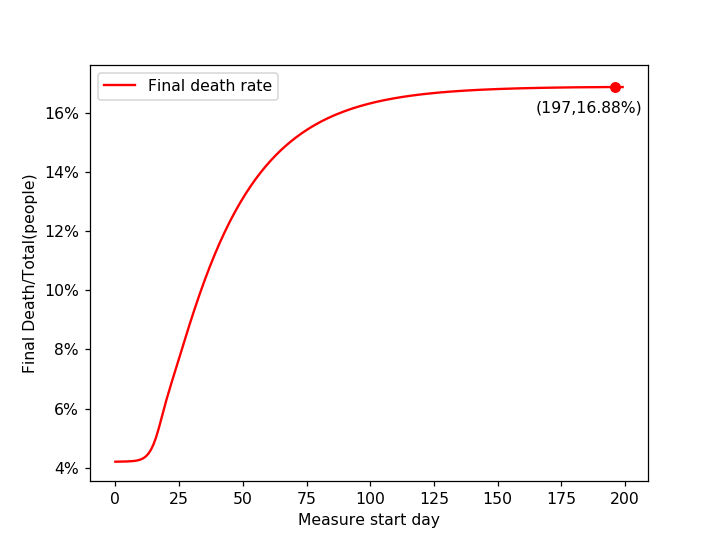

[ 470906.  471212.  471253.  471490.  471679.  472056.  472546.  473367.
  474594.  476554.  479571.  484255.  491344.  501873.  516947.  537597.
  564274.  596427.  632222.  668983.  704378.  737653.  769514.  800883.
  832233.  863659.  895078.  926351.  957336.  987908. 1017965. 1047428.
 1076235. 1104342. 1131718. 1158343. 1184206. 1209301. 1233630. 1257199.
 1280015. 1302091. 1323438. 1344074. 1364013. 1383273. 1401870. 1419824.
 1437153. 1453873. 1470005. 1485566. 1500573. 1515045. 1528998. 1542450.
 1555418. 1567917. 1579964. 1591574. 1602761. 1613542. 1623928. 1633936.
 1643577. 1652865. 1661813. 1670431. 1678733. 1686729. 1694431. 1701849.
 1708993. 1715874. 1722500. 1728881. 1735026. 1740943. 1746642. 1752129.
 1757413. 1762500. 1767399. 1772116. 1776658. 1781031. 1785242. 1789296.
 1793199. 1796957. 1800575. 1804059. 1807413. 1810641. 1813750. 1816743.
 1819624. 1822398. 1825068. 1827639. 1830114. 1832497. 1834791. 1836999.
 1839125. 1841171. 1843141. 1845038. 1846864. 18486

In [11]:
fig9 = plt.figure()
plt.plot(T, DataD/11210000, 'r',label="Final death rate")

plt.scatter(196,0.1687717099003827, color='r', marker='o') 
plt.text(165,0.16,'(197,16.88%)',)

# 百分数
def to_percent(temp, position):
   return '%1.0f'%(100*temp) + '%'
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(to_percent))

plt.xlabel("Measure start day")
plt.ylabel('Final Death/Total(people)')
plt.legend()

fig9.savefig('./Td_D_FinalDeathRate.svg', dpi = 400, bbox_inches = 'tight')
print(DataD)
